### Linear Regression and Learning Curve challenges

#### Challenge 1

Generate (fake) data that is linearly related to log(x).

You are making this model up. It is of the form B0 + B1*log(x) + epsilon. (You are making up the parameters.)

Simulate some data from this model.

Then fit two models to it:

quadratic (second degree polynomial)
logarithmic (log(x))
(The second one should fit really well, since it has the same form as the underlying model!)

In [271]:
import random
import math
import pandas as pd
import numpy as np
import statsmodels.api as sm
import patsy
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

In [107]:
B0 = 5
B1 = 10

epsilon = np.array([random.random() for i in range(100)])

epsilon

In [125]:
X = random.sample(range(1,101), 100)

In [126]:
log_x = np.log(X)

In [127]:
Y = B0 + B1 * log_x + epsilon

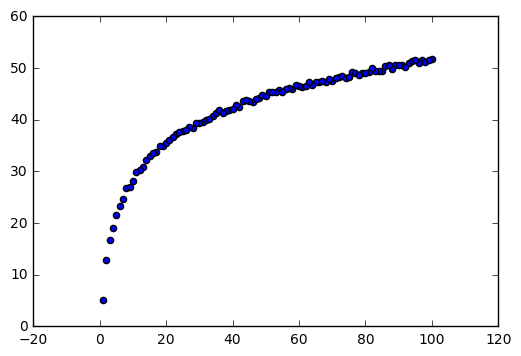

In [128]:
# Visuliation of the data points

plt.scatter(X, Y)

In [129]:
# Linear model

y, x = patsy.dmatrices('Y ~ X')

model = sm.OLS(y, x)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     392.5
Date:                Mon, 06 Feb 2017   Prob (F-statistic):           4.78e-36
Time:                        13:57:06   Log-Likelihood:                -283.71
No. Observations:                 100   AIC:                             571.4
Df Residuals:                      98   BIC:                             576.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     27.4208      0.841     32.620      0.000        25.753    29.089
X              0.2863      0.014     19.813      0.000         0.258     0.315
==============================================================================
Omnibus:                       74.455   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              438.730
Skew:                          -2.468   Prob(JB):                     5.38e-96
Kurtosis:                      11.996   Cond. No.                         117.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [130]:
# Log model

logY = np.log(X)

y, x = patsy.dmatrices('logY ~ X')

model = sm.OLS(y, x)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   logY   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     398.4
Date:                Mon, 06 Feb 2017   Prob (F-statistic):           2.68e-36
Time:                        13:57:07   Log-Likelihood:                -52.809
No. Observations:                 100   AIC:                             109.6
Df Residuals:                      98   BIC:                             114.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.1902      0.084     26.223      0.000         2.024     2.356
X              0.0287      0.001     19.959      0.000         0.026     0.032
==============================================================================
Omnibus:                       74.532   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              434.098
Skew:                          -2.478   Prob(JB):                     5.46e-95
Kurtosis:                      11.923   Cond. No.                         117.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [131]:
# Quadratic model

Y2 = np.power(X, 2)

y, x = patsy.dmatrices('Y2 ~ X')

model = sm.OLS(y, x)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Y2   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     1500.
Date:                Mon, 06 Feb 2017   Prob (F-statistic):           3.25e-61
Time:                        13:57:07   Log-Likelihood:                -803.26
No. Observations:                 100   AIC:                             1611.
Df Residuals:                      98   BIC:                             1616.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -1717.0000    151.683    -11.320      0.000     -2018.010 -1415.990
X            101.0000      2.608     38.732      0.000        95.825   106.175
==============================================================================
Omnibus:                       14.290   Durbin-Watson:                   2.265
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                9.864
Skew:                           0.638   Prob(JB):                      0.00721
Kurtosis:                       2.140   Cond. No.                         117.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Challenge 2

Generate (fake) data from a model of the form B0 + B1*x + B2*x^2 + epsilon. (You are making up the parameters.)

Split the data into a training and test set.

Fit a model to your training set. Calculate mean squared error on your training set. Then calculate it on your test set.

(You could use sklearn.metrics.mean_squared_error.)

In [274]:
B0 = 1
B1 = 10
B2 = 12

epsilon = np.array([random.random() for i in range(100)])

epsilon

array([ 0.26516824,  0.15720243,  0.31667143,  0.74588161,  0.55599018,
        0.64162872,  0.63924791,  0.69679989,  0.70949825,  0.66501564,
        0.32671833,  0.28059522,  0.919277  ,  0.79416866,  0.26351937,
        0.5240964 ,  0.75846077,  0.47352114,  0.14154966,  0.15924085,
        0.88147119,  0.83684664,  0.05699702,  0.55116594,  0.83898515,
        0.91120223,  0.97454943,  0.04595066,  0.09300062,  0.23159854,
        0.0914521 ,  0.48428721,  0.42939946,  0.80422444,  0.22218357,
        0.29796513,  0.82496098,  0.27043501,  0.64395054,  0.63112434,
        0.3337475 ,  0.04601991,  0.524713  ,  0.0150661 ,  0.44164888,
        0.04755573,  0.9067817 ,  0.88088191,  0.0697193 ,  0.76823574,
        0.34223187,  0.39280371,  0.18414155,  0.98375627,  0.35286747,
        0.66445176,  0.85156287,  0.11126049,  0.33279631,  0.06817099,
        0.41924037,  0.4816489 ,  0.50002909,  0.66233332,  0.83709995,
        0.34632971,  0.34793552,  0.62989663,  0.47376465,  0.49

In [275]:
x = np.array(random.sample(range(1,101), 100))

In [276]:
sqaure_x = np.power(x, 2)

In [279]:
Y = B0 + B1 * x + B2 * sqaure_x + epsilon

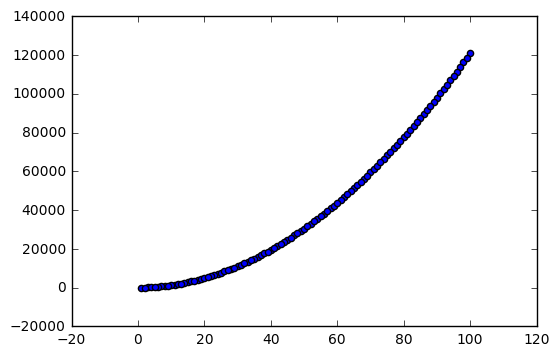

In [280]:
plt.scatter(x, Y)

In [281]:
df = pd.DataFrame({'Y':Y, 'X1': x, 'X2': sqaure_x})

In [282]:
X = df[['X1', 'X2']]

In [283]:
X1 = df[['X1']]

In [284]:
X2 = df[['X2']]

In [285]:
XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size = 0.2)

In [286]:
# Linear model

lr = LinearRegression()
lr.fit(XTrain, YTrain)
lr.score(XTest, YTest)

0.9999999999232998

In [287]:
y_est = lr.predict(XTest)
mse = metrics.mean_squared_error(YTest, y_est)
mse

0.066294843139217546

In [288]:
y_est = lr.predict(XTrain)
mse = metrics.mean_squared_error(YTrain, y_est)
mse

0.089339667209336102

#### Challenge 3

For the data from two (above), try polynomial fits from 0th (just constant) to 7th order (highest term x^7). Over the x axis of model degree (8 points), plot:

training error
test error
R squared
AIC


In [289]:
X0 = np.power(x, 0)
X1 = np.power(x, 1)
X2 = np.power(x, 2)
X3 = np.power(x, 3)
X4 = np.power(x, 4)
X5 = np.power(x, 5)
X6 = np.power(x, 6)
X7 = np.power(x, 7)

In [305]:
dfp = pd.DataFrame({'X0': X0, 'X1': X1, 'X2': X2, 'X3': X3, 'X4': X4, 'X5': X5, 'X6': X6, 'X7': X7})

In [307]:
dfp.head()

,X0,X1,X2,X3,X4,X5,X6,X7
0,1,36,1296,46656,1679616,60466176,2176782336,78364164096
1,1,28,784,21952,614656,17210368,481890304,13492928512
2,1,35,1225,42875,1500625,52521875,1838265625,64339296875
3,1,49,2401,117649,5764801,282475249,13841287201,678223072849
4,1,62,3844,238328,14776336,916132832,56800235584,3521614606208


In [371]:
feature_list = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7']

In [372]:
feature_list[1:]

['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7']

In [514]:
# CONVERT FUNCTIONS TO A LOOP
# Plot the MSE Train and Test errors, R sqaured

feature_list = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7']

def find_train_test_r():
    
    X_axis = list(range(8))
    mse_train_list = []
    mse_test_list = []
    score_list = []
    
    for i in range(8):
        
        X =  dfp[(feature_list[:i+1])] 
        
        XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size = 0.2)
        
        lr.fit(XTrain, YTrain)

        y_est_train = lr.predict(XTrain)
        y_est_test = lr.predict(XTest)

        mse_train = metrics.mean_squared_error(YTrain, y_est_train)
        mse_test = metrics.mean_squared_error(YTest, y_est_test)

        score = lr.score(XTest, YTest)
        
        mse_train_list.append(mse_train)
        mse_test_list.append(mse_test)
        score_list.append(score)
        
    plt.plot(X_axis, mse_train_list)
    plt.plot(X_axis, mse_test_list)
    plt.plot(X_axis, score_list)
    
    return score_list
    

[-0.033687439646699957,
 0.93261726281897539,
 0.99999999995258193,
 0.99999999994633193,
 0.99999999992801492,
 0.99999999991434974,
 0.99999999990748978,
 0.99999999990263766]

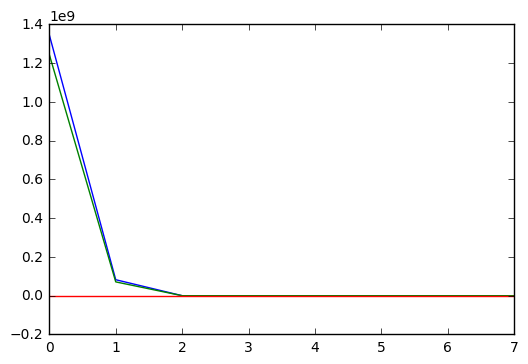

In [515]:
find_train_test_r()

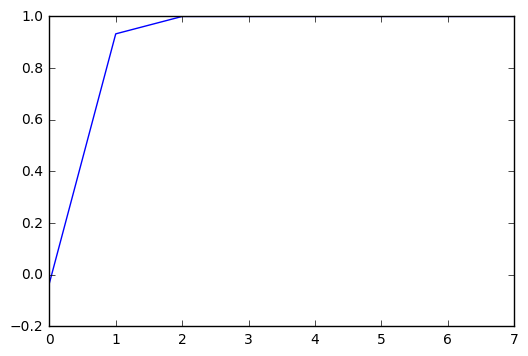

In [516]:
# Plot R squared, since r squared is hard to see in the plot above due to high scale

plt.plot(X_axis, [-0.033687439646699957,
 0.93261726281897539,
 0.99999999995258193,
 0.99999999994633193,
 0.99999999992801492,
 0.99999999991434974,
 0.99999999990748978,
 0.99999999990263766])

#### Challenge 4

For the data from two (above), fit a model to only the first 5 of your data points (m=5). Then to first 10 (m=10). Then to first 15 (m=15). In this manner, keep fitting until you fit your entire training set. For each step, calculate the training error and the test error. Plot both (in the same plot) over m. This is called a learning curve.

In [531]:
m = []

for n in range(1,21):
    m.append(5*n)

In [533]:
len(m)

20

In [558]:
X = dfp[['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7']]
X_axis = list(range(1,21))

def fit_data():
    
    mse_train_list = []
    mse_test_list = []
    
    for i in m:
        X_data = (X.iloc[:i])
        Y_data = (pd.DataFrame(Y)).iloc[:i]

        XTrain, XTest, YTrain, YTest = train_test_split(X_data, Y_data, test_size = 0.2)

        lr.fit(XTrain, YTrain)
        y_est_train = lr.predict(XTrain)
        y_est_test = lr.predict(XTest)

        mse_train_list.append(metrics.mean_squared_error(YTrain, y_est_train))
        mse_test_list.append(metrics.mean_squared_error(YTest, y_est_test))


    fig, ax = plt.subplots(2,1)
    ax[0].plot(X_axis, mse_train_list)
    ax[1].plot(X_axis, mse_test_list)
    

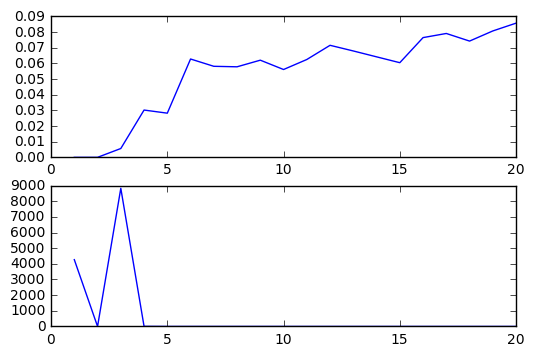

In [559]:
fit_data()